In [11]:
#Here we will be predicting the cost of medical insurance.
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt

In [2]:
ins = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\ML project\Project_8\insurance.csv')

In [3]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
ins.shape

(1338, 7)

In [8]:
ins['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [9]:
ins['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [10]:
ins['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Axes: xlabel='children', ylabel='count'>

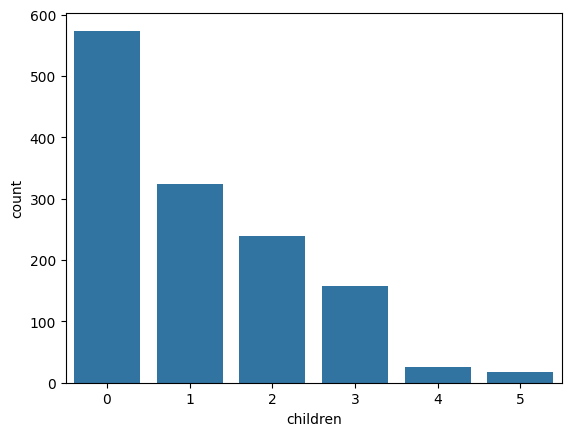

In [14]:
plt.Figure(figsize=(1,1))
sns.countplot(x='children',data=ins)

In [21]:
#data pre-processing
ins['sex'].replace({'male':0,'female':1},inplace=True)
ins['region'].replace({'southeast':0,'southwest':1,'northeast':2,'northwest':3},inplace=True)
ins['smoker'].replace({'yes':0,'no':1},inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12876\1210589230.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ins['region'].replace({'southeast':0,'southwest':1,'northeast':2,'northwest':3},inplace=True)


In [22]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [23]:
#separting target and the features
X= ins.drop(columns='charges',axis=1)
Y = ins['charges']

In [26]:

print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [27]:
#traing and test separation
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [28]:
model = LinearRegression()

In [31]:
model.fit(X_train,Y_train)

LinearRegression()

In [42]:
p1=model.predict(X_test)
mse_ = mse(Y_test,p1)
r2_ = r2(Y_test,p1)
print(str(mse_)) 

38337035.48643883
